In [85]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [86]:
df=pd.read_csv("delivery_time.csv")

In [87]:
df.head()
df.shape

(21, 2)

<AxesSubplot:xlabel='Sorting_Time', ylabel='Delivery_Time'>

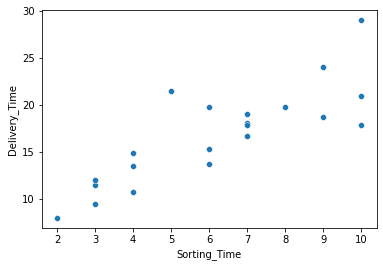

In [88]:
sns.scatterplot(x=df.Sorting_Time,y=df.Delivery_Time)

In [89]:
df.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


In [90]:
%matplotlib inline

In [91]:
from statsmodels.regression import linear_model

In [92]:
import statsmodels.formula.api as smf

In [93]:
model=smf.ols("Delivery_Time~Sorting_Time", data=df).fit()

In [94]:
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [95]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 01 Oct 2021   Prob (F-statistic):           3.98e-06
Time:                        10:12:58   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
model.predict(df.Sorting_Time)

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [97]:
diff= df.Delivery_Time-model.predict(df.Sorting_Time)

In [98]:
diff

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

In [99]:
model.resid

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

In [100]:
np.round(model.tvalues,3)

Intercept       3.823
Sorting_Time    6.387
dtype: float64

In [101]:
np.round(model.pvalues, 3)

Intercept       0.001
Sorting_Time    0.000
dtype: float64

In [102]:
(np.round(model.rsquared,3))

0.682

In [103]:
model.rsquared_adj

0.6655489208860244

In [104]:
1/(1-(np.round(model.rsquared,3)))

3.144654088050315

In [105]:
import statsmodels.api as sm

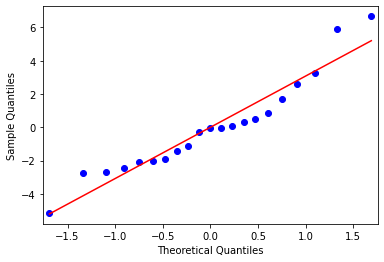

In [106]:
sm.qqplot(model.resid, line="r")
plt.show()

In [107]:
list(np.where(model.resid>5))

[array([ 4, 20], dtype=int64)]

In [108]:
def standard(vals):
    values= (vals-vals.mean())/vals.std()
    return values

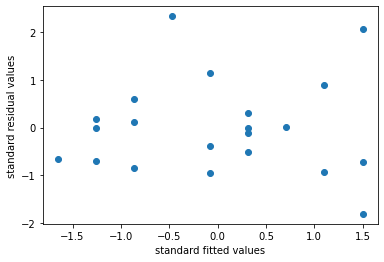

In [109]:
plt.scatter(standard(model.fittedvalues), standard(model.resid))
plt.xlabel("standard fitted values")
plt.ylabel("standard residual values")
plt.show()

In [110]:
standard(model.resid)

0    -0.724652
1     0.112280
2     1.144221
3     0.900544
4     2.071973
5    -0.393923
6     0.305576
7    -0.709572
8    -1.808345
9    -0.934742
10    0.019264
11   -0.849060
12   -0.505446
13   -0.010415
14    0.174861
15    0.594698
16   -0.953248
17   -0.005549
18   -0.657477
19   -0.103431
20    2.332444
dtype: float64

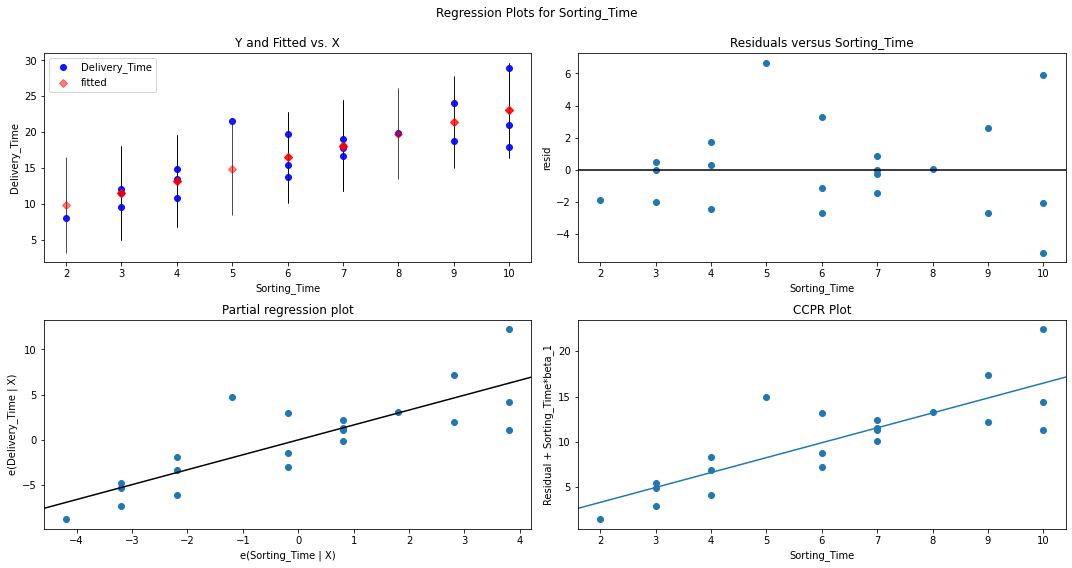

In [111]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,"Sorting_Time", fig=fig)
plt.show()

In [112]:
np.arange(len(df))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [113]:
c,a=model.get_influence().cooks_distance

In [114]:
c

array([5.65174628e-02, 6.05802657e-04, 3.28610455e-02, 5.27064095e-02,
       4.62053041e-01, 3.89480081e-03, 2.60419093e-03, 3.96028930e-02,
       3.51953954e-01, 5.67854347e-02, 1.49639848e-05, 3.46421730e-02,
       7.12499306e-03, 8.53239427e-06, 2.40503559e-03, 1.69949775e-02,
       2.28073073e-02, 8.58728156e-07, 5.65138719e-02, 2.98356431e-04,
       1.70820972e-01])

In [115]:
np.where(c>0.25)

(array([4, 8], dtype=int64),)

In [116]:
df[df.index.isin([4,8])]

,Delivery_Time,Sorting_Time
4,29.0,10
8,17.9,10


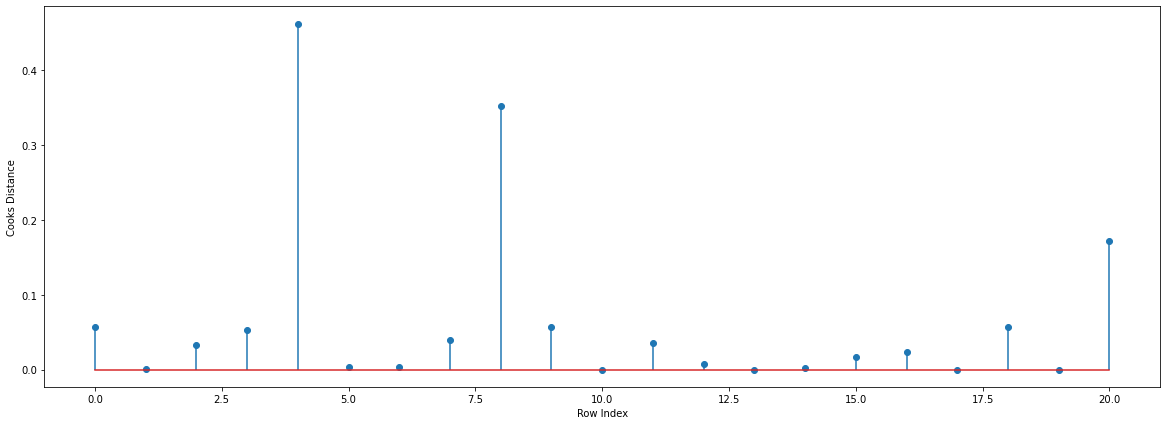

In [117]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(df)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [118]:
np.argmax(c)

4

In [119]:
np.max(c)

0.4620530412650319

In [120]:
df1=df.drop(df.index[[4]], axis=0).reset_index(drop=True)

In [121]:
df1

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,15.35,6
5,19.00,7
6,9.50,3
7,17.90,10
8,18.75,9
9,19.83,8


In [122]:
model2=smf.ols("Delivery_Time~Sorting_Time", data=df1).fit()

In [123]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     34.97
Date:                Fri, 01 Oct 2021   Prob (F-statistic):           1.35e-05
Time:                        10:13:01   Log-Likelihood:                -46.449
No. Observations:                  20   AIC:                             96.90
Df Residuals:                      18   BIC:                             98.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        7.5342      1.574      4.788      0.000       4.228      10.840
Sorting_Time     1.4411      0.244      5.914      0.000       0.929       1.953
==============================================================================
Omnibus:                        5.574   Durbin-Watson:                   1.344
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.289
Skew:                           0.906   Prob(JB):                        0.193
Kurtosis:                       3.816   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [124]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 01 Oct 2021   Prob (F-statistic):           3.98e-06
Time:                        10:13:01   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [125]:
df3=pd.read_csv("D:\pyt\Assignment\Assignment 4-Simple Linear Regression/delivery_time.csv")

In [126]:
log_model= smf.ols("np.log(Delivery_Time)~np.log(Sorting_Time)" , data=df3).fit()

In [127]:
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Fri, 01 Oct 2021   Prob (F-statistic):           1.60e-07
Time:                           10:13:01   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(Sorting_Time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [128]:
np.sqrt(np.mean(log_model.resid*log_model.resid))

0.14823312083501494

In [135]:
predi=log_model.predict(df3.Sorting_Time)

In [136]:
predicted=np.exp(predi)

In [137]:
resid1=predicted-df.Delivery_Time

In [138]:
np.sqrt(np.mean(resid1*resid1))

2.74582889761455

In [139]:
resid1

0     1.597360
1    -0.429877
2    -3.096784
3    -2.781407
4    -6.402640
5     1.303216
6    -0.740019
7     1.505911
8     4.697360
9     2.468593
10   -0.053392
11    2.320123
12    1.579981
13   -0.494089
14   -1.024089
15   -1.809877
16    2.903216
17    0.149981
18    0.637887
19    0.429981
20   -6.565676
dtype: float64

In [142]:
log_model.resid

0    -0.073311
1     0.032361
2     0.170550
3     0.123176
4     0.249463
5    -0.081488
6     0.039727
7    -0.147141
8    -0.233032
9    -0.123684
10    0.002696
11   -0.195423
12   -0.090501
13    0.043915
14    0.088971
15    0.129689
16   -0.191565
17   -0.008248
18   -0.076716
19   -0.023829
20    0.364391
dtype: float64